In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
num_cols=[features for features in df.columns if df[features].dtype !="object"]
print("these are all the numerical columns:",num_cols)

these are all the numerical columns: ['math score', 'reading score', 'writing score']


In [12]:
cat_cols=[features for features in df.columns if df[features].dtype =="object"]
print("these are all the categorial columns:",cat_cols)

these are all the categorial columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df["Total Score"]=df['math score']+df['reading score']+df['writing score']
df["Average Score"]=df["Total Score"]/3

In [14]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='Average Score', ylabel='Count'>

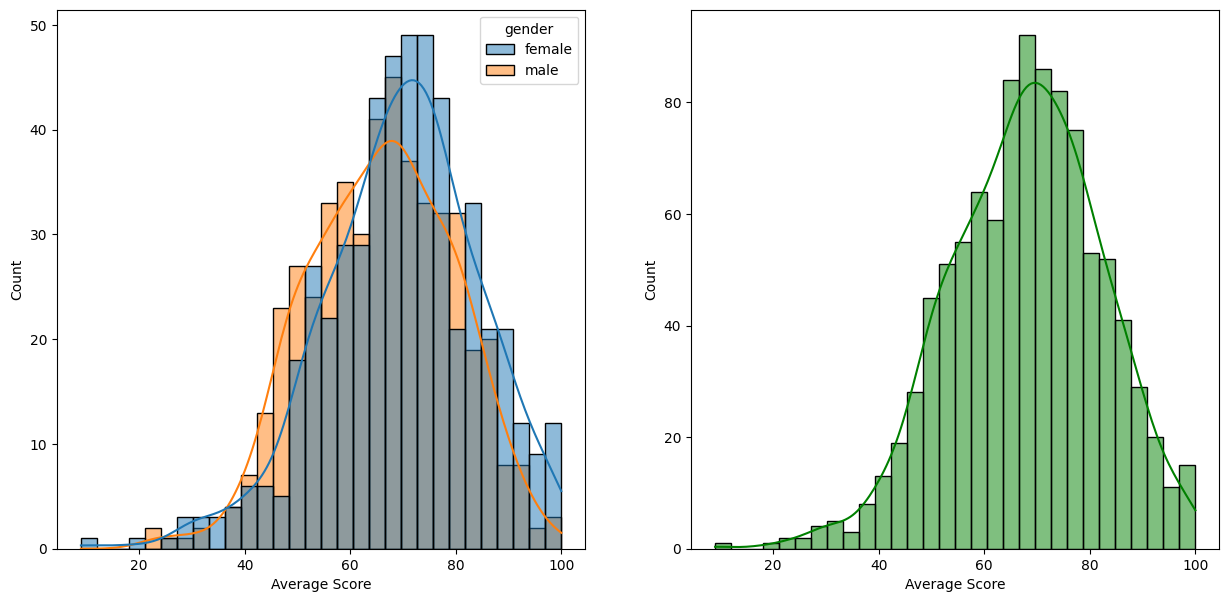

In [15]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average Score",bins=30,kde=True,color='g',hue="gender")
plt.subplot(122)
sns.histplot(data=df,x="Average Score",bins=30,kde=True,color='g',)

<Axes: xlabel='Total Score', ylabel='Count'>

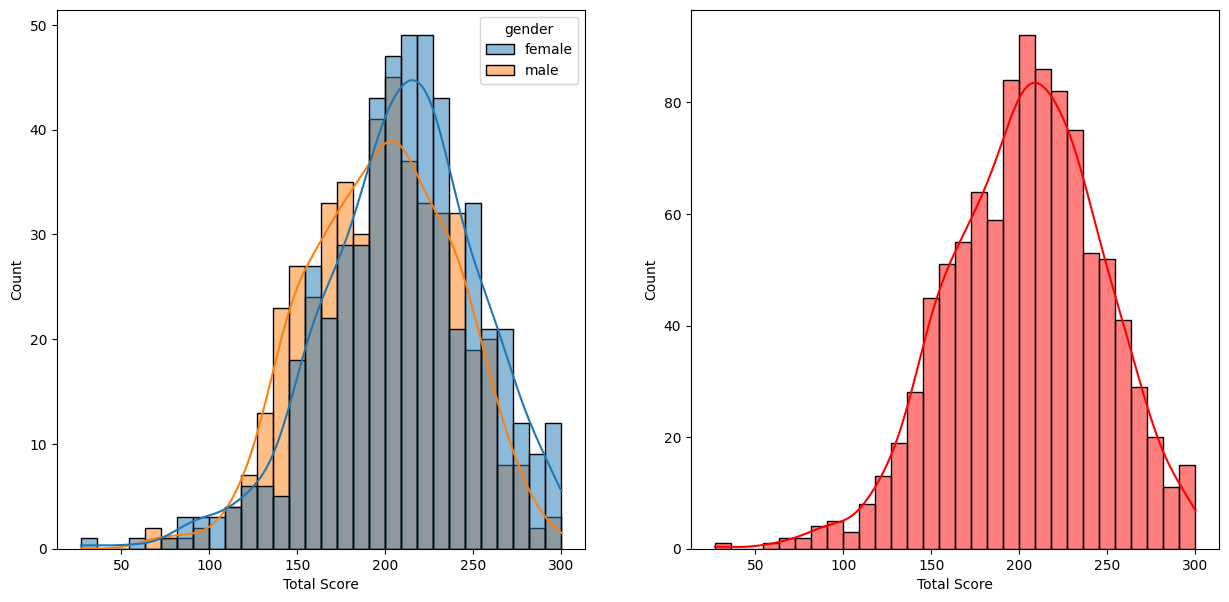

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total Score",bins=30,kde=True,color='r',hue="gender")
plt.subplot(122)
sns.histplot(data=df,x="Total Score",bins=30,kde=True,color='r')

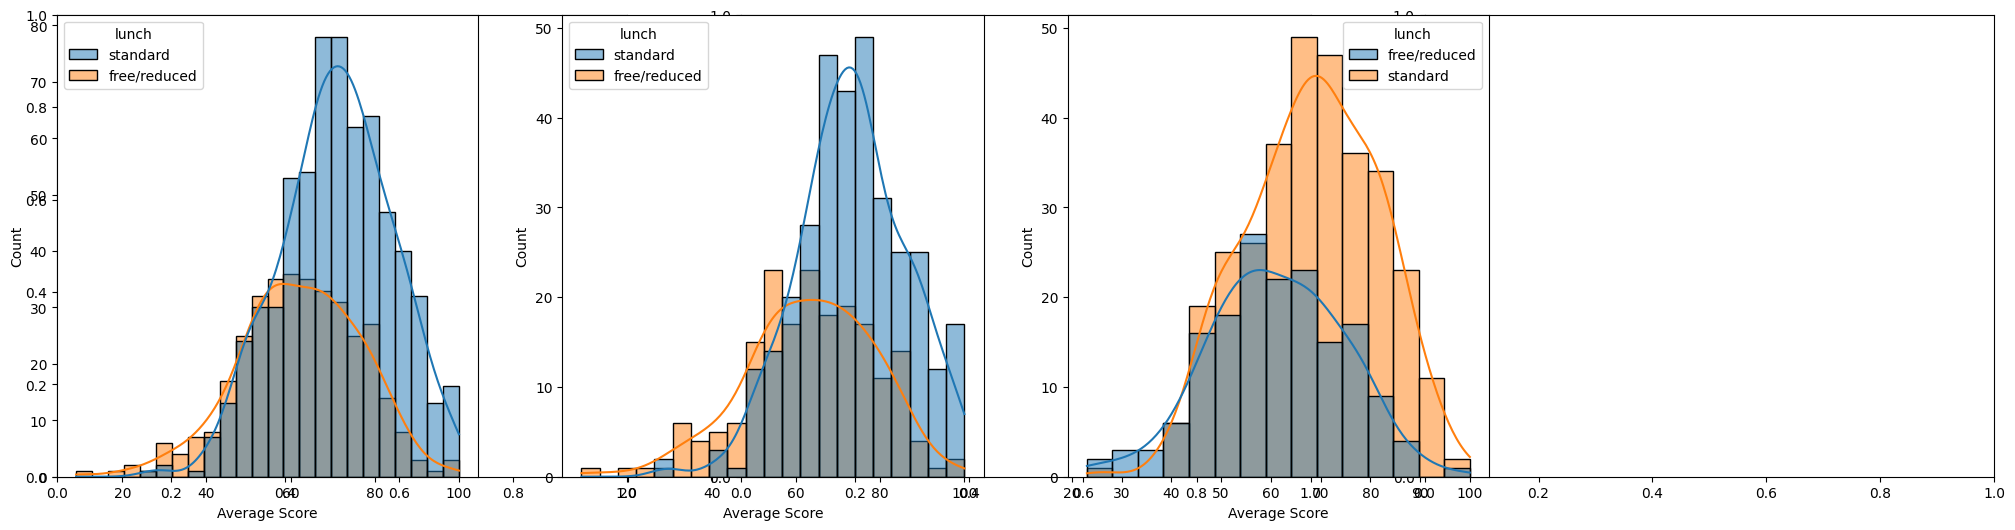

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average Score",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average Score",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average Score",kde=True,hue="lunch")
plt.show()

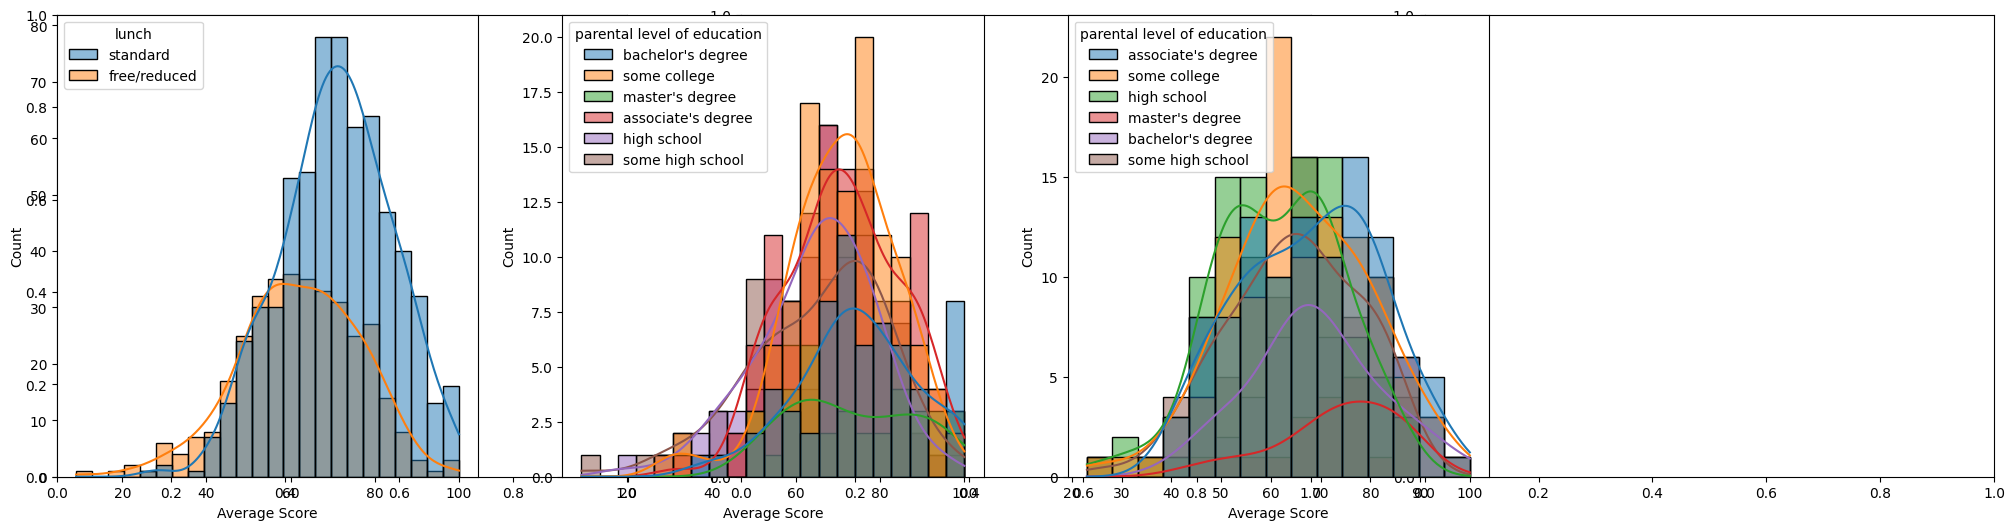

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average Score",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average Score",kde=True,hue="parental level of education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average Score",kde=True,hue="parental level of education")
plt.show()

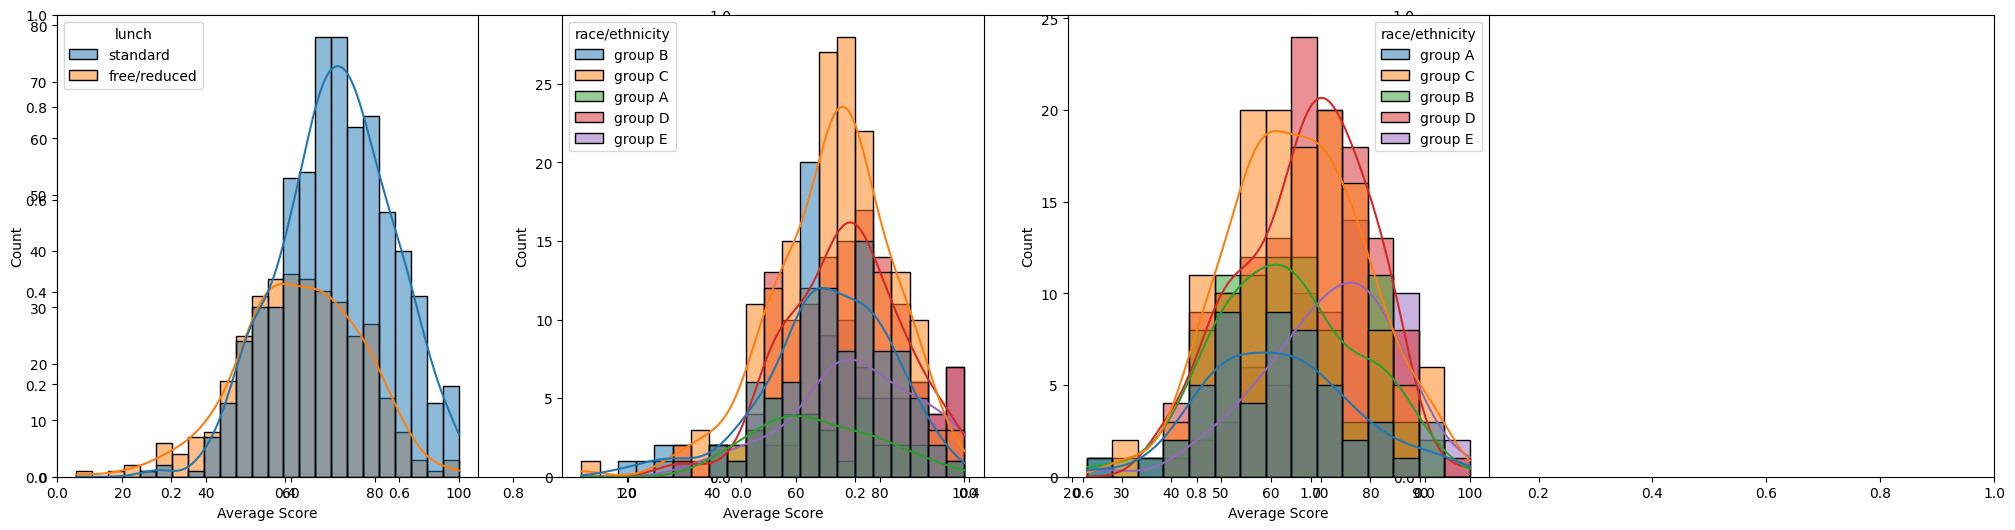

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average Score",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average Score",kde=True,hue="race/ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average Score",kde=True,hue="race/ethnicity")
plt.show()

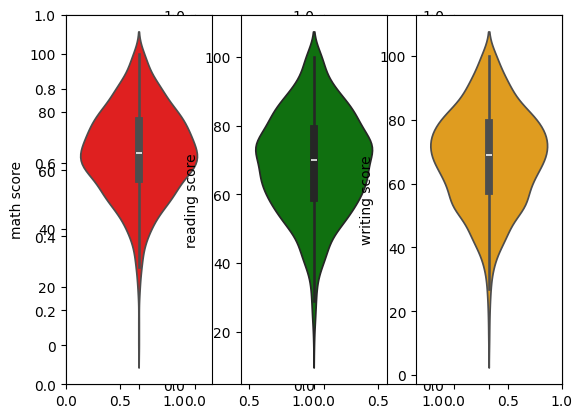

In [67]:
plt.subplots(1,4)
plt.subplot(1,3,1)
sns.violinplot(data=df,y="math score",color="red")
plt.subplot(1,3,2)
sns.violinplot(data=df,y="reading score",color="green")
plt.subplot(1,3,3)
sns.violinplot(data=df,y="writing score",color="orange")
plt.show()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

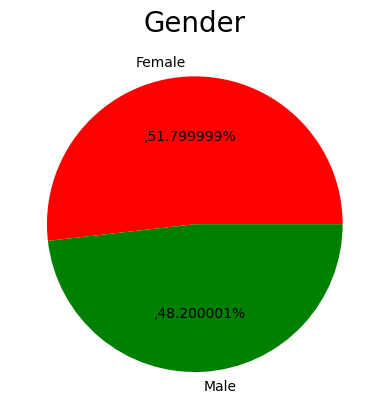

In [54]:
size=df["gender"].value_counts()
labels=["Female","Male"]
color=["red","green"]

plt.pie(size,colors=color,labels=labels,autopct=",%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

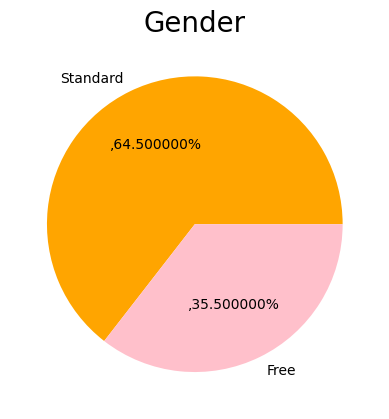

In [55]:
size=df["lunch"].value_counts()
labels=["Standard","Free"]
color=["Orange","pink"]

plt.pie(size,colors=color,labels=labels,autopct=",%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

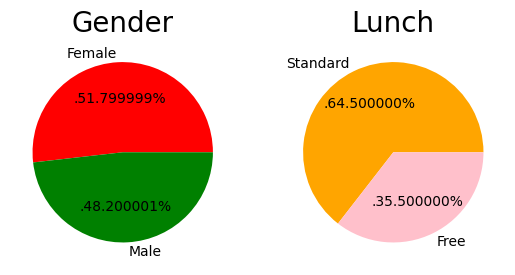

In [62]:
size=df["gender"].value_counts()
labels=["Female","Male"]
color=["red","green"]

plt.subplot(1,2,1)
plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,2,2)
size=df["lunch"].value_counts()
labels=["Standard","Free"]
color=["Orange","pink"]

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Lunch",fontsize=20)
plt.axis("off")

<Axes: ylabel='math score'>

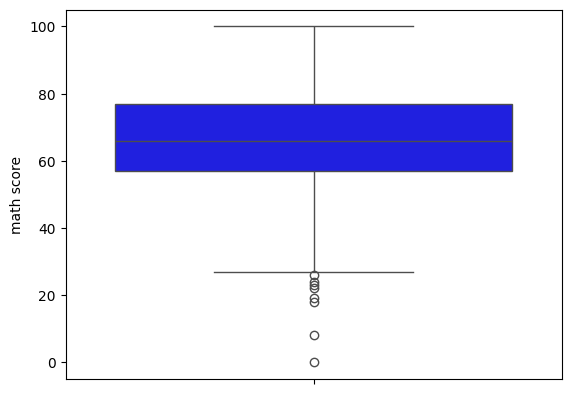

In [68]:
sns.boxplot(df["math score"],color="blue")

<Axes: ylabel='writing score'>

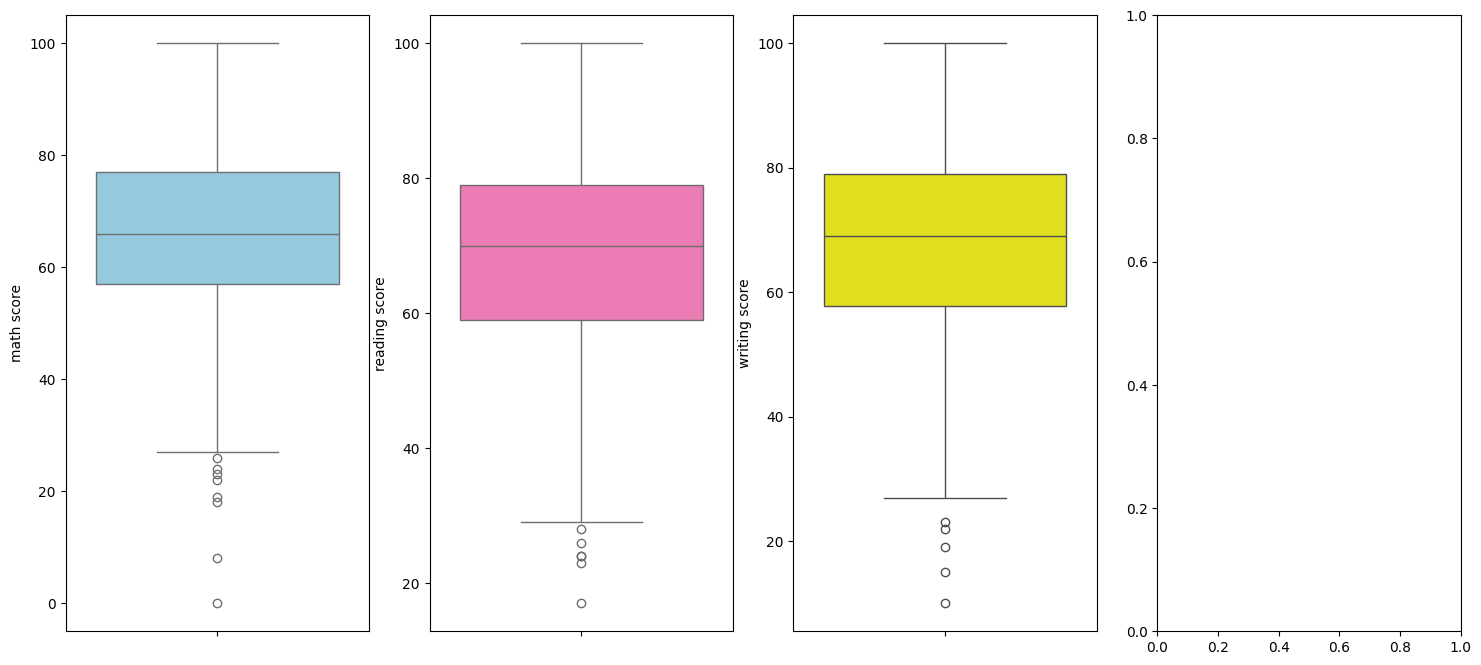

In [76]:
plt.subplots(1,4,figsize=(18,8))
plt.subplot(1,4,1)
sns.boxplot(df["math score"],color="skyblue")
plt.subplot(1,4,2)
sns.boxplot(df["reading score"],color="hotpink")
plt.subplot(1,4,3)
sns.boxplot(df["writing score"],color="yellow")

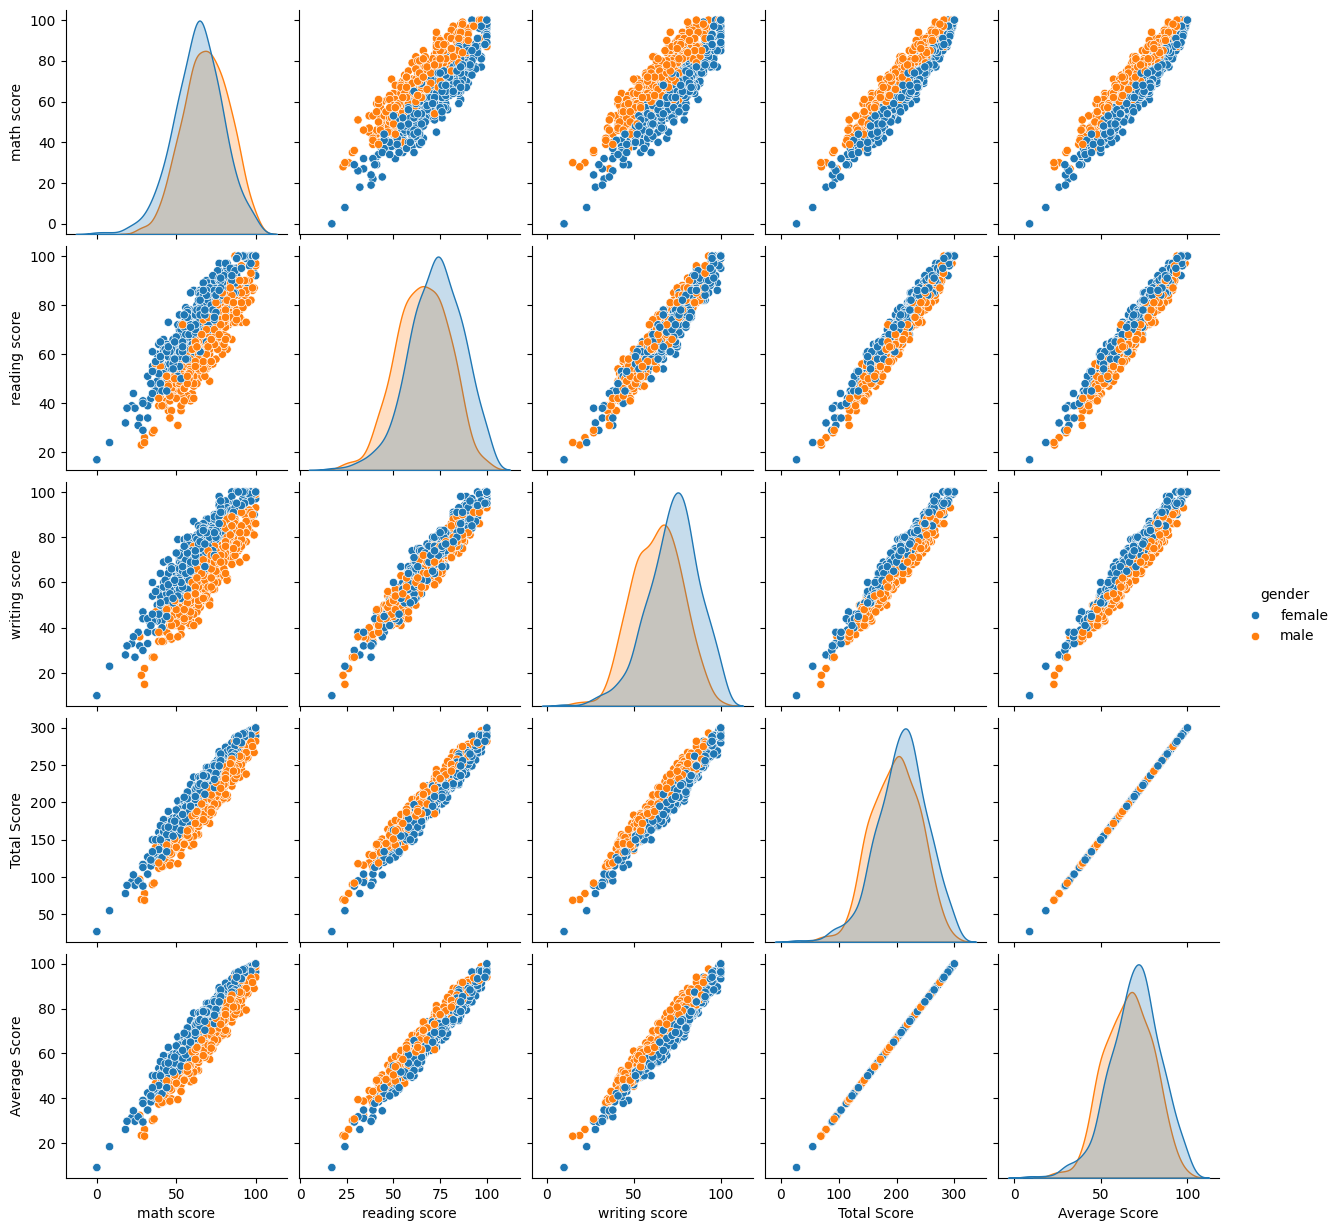

In [77]:
sns.pairplot(df,hue="gender")